In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import scipy.stats




Populating the interactive namespace from numpy and matplotlib


In [2]:
dfs1=pd.read_csv('/Users/bhagwatsinghbisht/Downloads/201508-citibike-tripdata.csv')  # for summer
dfs2=pd.read_csv('/Users/bhagwatsinghbisht/Downloads/201507-citibike-tripdata.csv')
dfs3=pd.read_csv('/Users/bhagwatsinghbisht/Downloads/201506-citibike-tripdata.csv')

In [3]:
frames = [dfs1,dfs2,dfs3]
dfs = pd.concat(frames, ignore_index=True)
dfs.count()

tripduration               3205939
starttime                  3205939
stoptime                   3205939
start station id           3205939
start station name         3205939
start station latitude     3205939
start station longitude    3205939
end station id             3205939
end station name           3205939
end station latitude       3205939
end station longitude      3205939
bikeid                     3205939
usertype                   3205939
birth year                 2674181
gender                     3205939
dtype: int64

In [4]:
dfw1=pd.read_csv('/Users/bhagwatsinghbisht/Downloads/201501-citibike-tripdata.csv')  # for winter
dfw2=pd.read_csv('/Users/bhagwatsinghbisht/Downloads/201502-citibike-tripdata.csv')

In [5]:
frame = [dfw1,dfw2]
dfw = pd.concat(frame, ignore_index=True)
dfw.count()

tripduration               482482
starttime                  482482
stoptime                   482482
start station id           482482
start station name         482482
start station latitude     482482
start station longitude    482482
end station id             482482
end station name           482482
end station latitude       482482
end station longitude      482482
bikeid                     482482
usertype                   482482
birth year                 474587
gender                     482482
dtype: int64

In [6]:
dfw['age'] = 2015-dfw['birth year'][(dfw['usertype'] == 'Subscriber')]
dfs['age'] = 2015-dfs['birth year'][(dfs['usertype'] == 'Subscriber')]

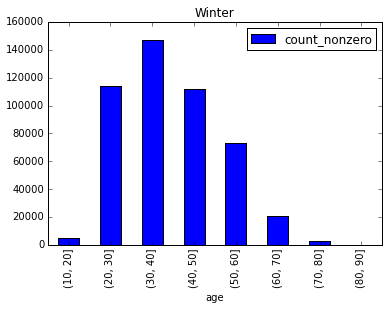

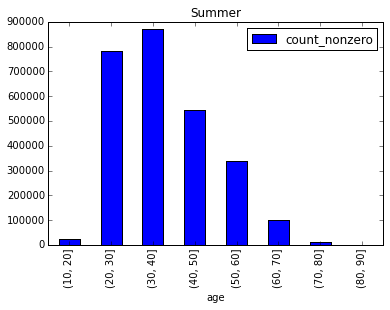

In [7]:
bins = np.arange(10, 99, 10)
dfw.age.groupby(pd.cut(dfw.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = dfw.age[~np.isnan(dfw['age'])].groupby(pd.cut(dfw.age[~np.isnan(dfw['age'])], bins)).agg([count_nonzero])
dfs.age.groupby(pd.cut(dfs.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = dfs.age[~np.isnan(dfs['age'])].groupby(pd.cut(dfs.age[~np.isnan(dfs['age'])], bins)).agg([count_nonzero])
    

# Anderson test for distribution 

In [10]:
scipy.stats.anderson(W_age_dist['count_nonzero'], dist='norm')


(0.52524719226309102,
 array([ 0.519,  0.591,  0.709,  0.827,  0.984]),
 array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [9]:
scipy.stats.anderson(S_age_dist['count_nonzero'], dist='norm')

(0.51294415781601543,
 array([ 0.519,  0.591,  0.709,  0.827,  0.984]),
 array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

# since the anderson value is smaller than critical value , we fail to reject the null hypothesis that the sample   is drawn from a population that follows a gausian distributio

# Shapiro Wilk Test 

In [11]:
scipy.stats.shapiro(S_age_dist['count_nonzero'])

(0.8517548441886902, 0.09924410283565521)

In [12]:
scipy.stats.shapiro(W_age_dist['count_nonzero'])

(0.8571709990501404, 0.11250919103622437)

## Observation : The p Value is .09 which is greater than alpha , i.e .05 , which means that the sample from which the data is drawn is from gaussian distribution 